In [2]:
import pandas as pd
import os

In [3]:
os.getcwd()

'/Users/chanchan/udemy_variables'

In [4]:
movies = pd.read_csv("Movie-Ratings.csv")

In [5]:
len(movies)

559

In [6]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies.columns = ["Film","Genre","CriticRating","AudienceRating","BudgetMillion","Year"]

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillion,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [10]:
movies.Film = movies.Film.astype("category")

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [12]:
movies.Genre = movies.Genre.astype("category")
movies.Year = movies.Year.astype("category")

In [13]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [14]:
movies.Film.cat.categories

Index(['(500) Days of Summer ', '10,000 B.C.', '12 Rounds ', '127 Hours',
       '17 Again ', '2012', '27 Dresses', '30 Days of Night',
       '30 Minutes or Less', '50/50',
       ...
       'Yes Man', 'Yogi Bear', 'You Again', 'You Don't Mess with the Zohan',
       'You Will Meet a Tall Dark Stranger', 'Your Highness',
       'Youth in Revolt', 'Zodiac', 'Zombieland ', 'Zookeeper'],
      dtype='object', length=559)

In [15]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillion
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

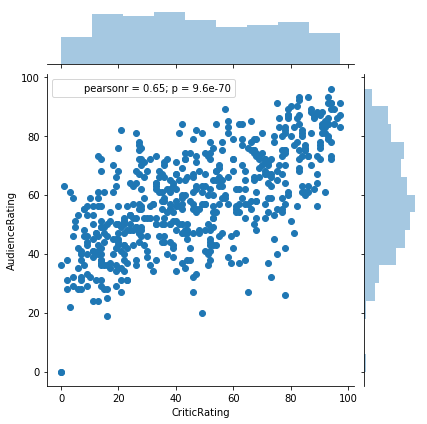

In [17]:
#jointplots
#basically a scatter plot to show any relationship or dependency between critic rating and audience rating
#distributions on left and right. this is visual of bivariate rating
j = sns.jointplot(data = movies, x = "CriticRating", y = "AudienceRating")

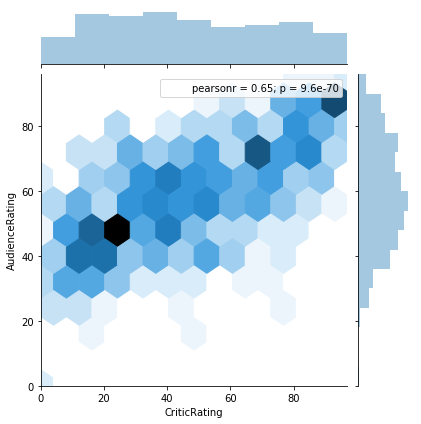

In [18]:
#hexagon is useful because it groups dots and shows clusters
j = sns.jointplot(data = movies, x = "CriticRating", y = "AudienceRating", kind = "hex" )

In [19]:
#<<<<<Chart1

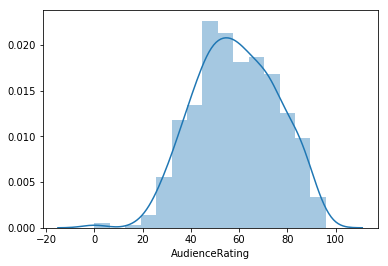

In [20]:
#<<<<<Chart2
m1 = sns.distplot(movies.AudienceRating, bins = 15)

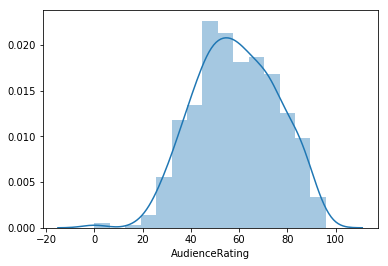

In [21]:
#<<<<<<Chart 3
m2 = sns.distplot(movies.AudienceRating, bins = 15)

In [22]:
#seaborn is an add on in terms of pyplot (packages in a lot of convenient things)

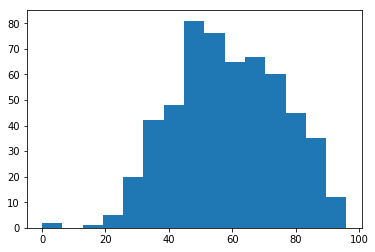

In [23]:
#old school plt histogram
n1 = plt.hist(movies.AudienceRating, bins = 15)

In [24]:
#way to change all grid styles sns.setstyle = ("white")
n2 = plt.hist(movies.CriticScore, bins =15)

AttributeError: 'DataFrame' object has no attribute 'CriticScore'

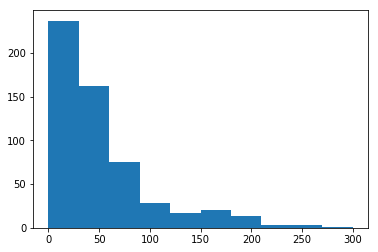

In [25]:
#stacked histograms
h1 = plt.hist(movies.BudgetMillion)

(array([11.,  9.,  2.,  5.,  2.,  4.,  1.,  0.,  1.,  1.]),
 array([  4. ,  22.1,  40.2,  58.3,  76.4,  94.5, 112.6, 130.7, 148.8,
        166.9, 185. ]),
 <a list of 10 Patch objects>)

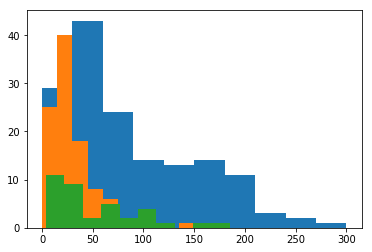

In [26]:
#can put any category of movie
plt.hist(movies[movies.Genre == "Action"].BudgetMillion)
plt.hist(movies[movies.Genre == "Drama"].BudgetMillion)
plt.hist(movies[movies.Genre == "Thriller"].BudgetMillion)


([array([ 9., 39., 24., 13., 16.,  9.,  8., 14.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.]),
  array([48., 80., 35., 19., 18., 10.,  8., 15.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.])],
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300.]),
 <a list of 2 Lists of Patches objects>)

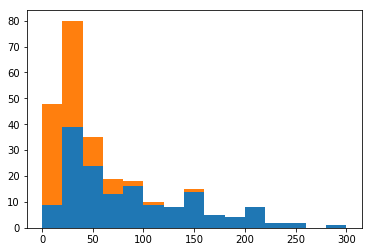

In [27]:
plt.hist([(movies[movies.Genre == "Action"].BudgetMillion), (movies[movies.Genre == "Drama"].BudgetMillion)], stacked = True, bins = 15)

In [28]:
#create loop
movies.Genre.cat.categories


Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [29]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


In [30]:
list1 = []
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillion)
    mylabels.append(gen)

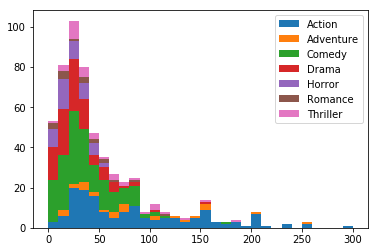

In [31]:

h = plt.hist(list1,bins = 30, stacked = True, label=mylabels)
plt.legend()

In [32]:
print(mylabels)

['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']


In [33]:
#<<<<< chart 4

In [34]:
#kdl kernal density estimate plot

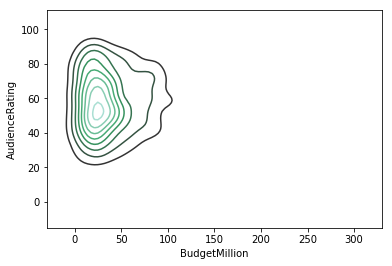

In [35]:
viz1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating)


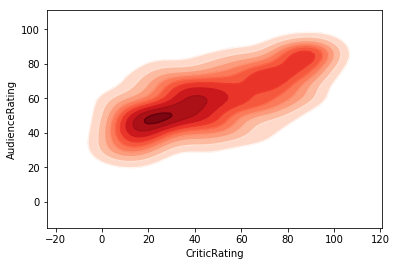

In [36]:
#look through seaborn gallery to see what they have available such as kernal density estimate plot
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest = False, cmap = 'Reds'
                )
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap = "Reds"
                )

In [37]:
#working with subplots allows you to make more sophisticated vizualizations and combine them together


In [38]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
% matplotlib inline

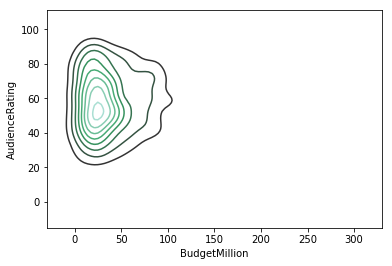

In [39]:

viz1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating)

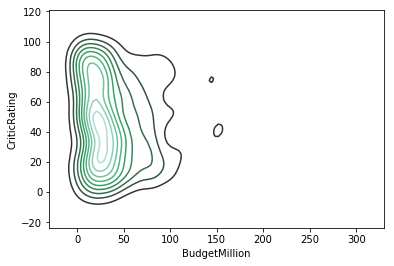

In [40]:
viz2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating)

[(-20, 160)]

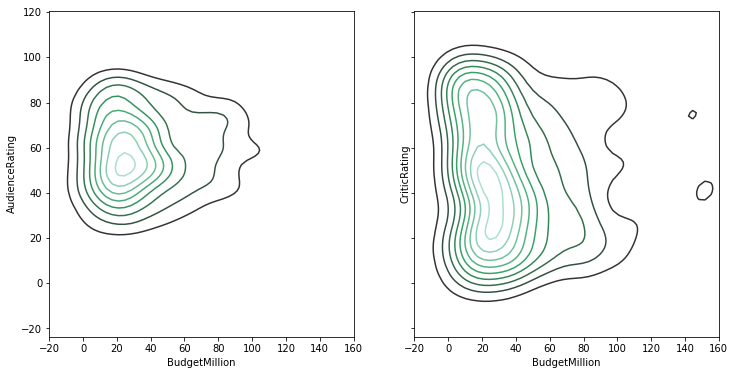

In [41]:
## what is a subplot and how do you use it
f,axes = plt.subplots(1,2, figsize =(12,6), sharex=True, sharey= True)  #how many rows and how many columns so we can place charts next to each other
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax = axes[0])
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating, ax = axes[1])
k1.set(xlim = (-20, 160))

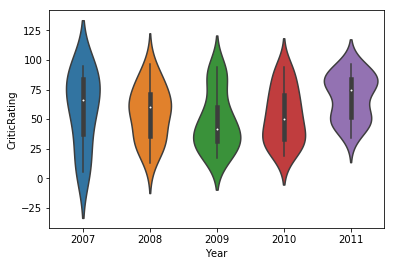

In [42]:
#violin plots vs box plots
z= sns.violinplot(data = movies[movies.Genre == 'Drama'], x= "Year", y = "CriticRating")

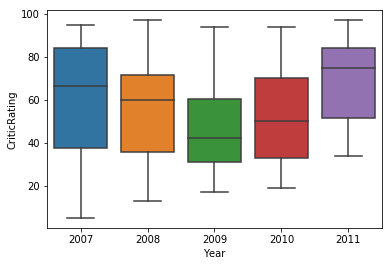

In [43]:
z= sns.boxplot(data = movies[movies.Genre == "Drama"], x= "Year", y = "CriticRating")

In [44]:
#executives really like box plots

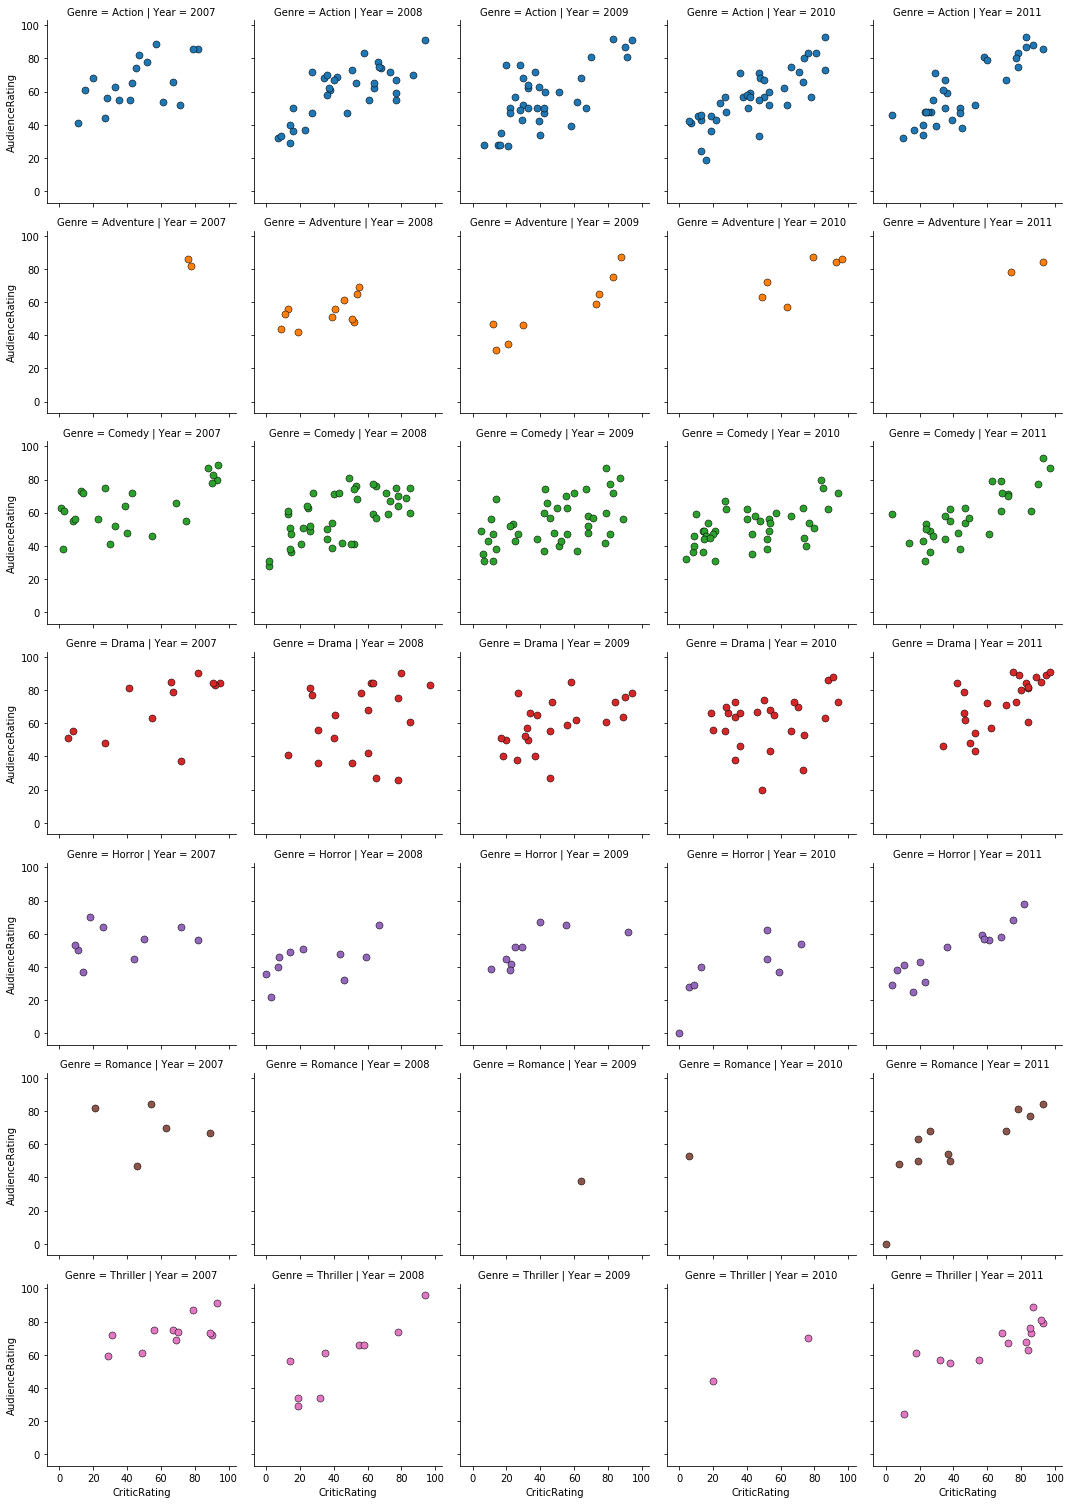

In [37]:
#creating a facet grid
#splitting up a vizualixation based on the rules you specify
#click on left will make it collapse
g = sns.FacetGrid(data = movies, col = 'Year', row = 'Genre', hue = 'Genre')
kws = dict(s = 50, linewidth = 0.5, edgecolor = "black")
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **kws )
#(data = movies, x="CriticRating", y = "AudienceRating")

#Can populate with any typle of chart

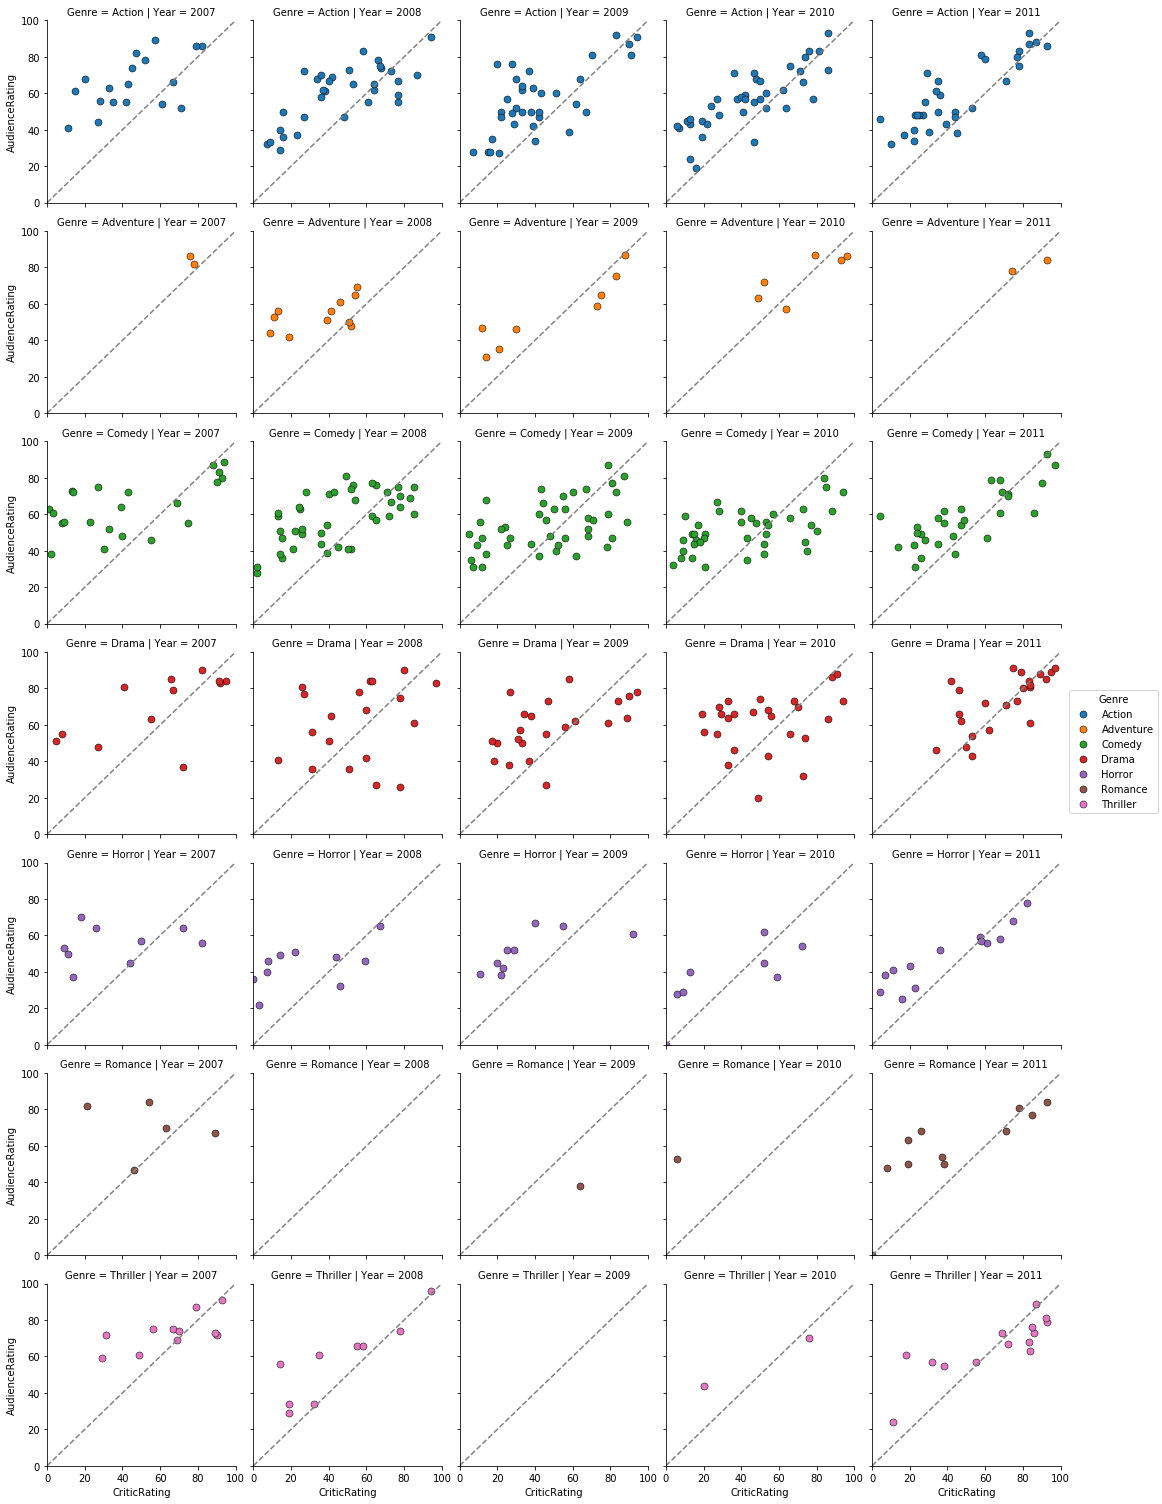

In [38]:
#controlling axes and adding diagnol
g = sns.FacetGrid(data = movies, col = 'Year', row = 'Genre', hue = 'Genre')
kws = dict(s = 50, linewidth = 0.5, edgecolor = "black")
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **kws )
g.set(xlim =(0,100),ylim =(0,100) )
#create a mother fucking loop
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c = "gray", ls = "--")
g.add_legend()
    

In [39]:
#<<<<<<chart # 5

In [ ]:
#Building Dashboards
#a dashboard is a combination of charts. You can create dashboards using the subplots function 

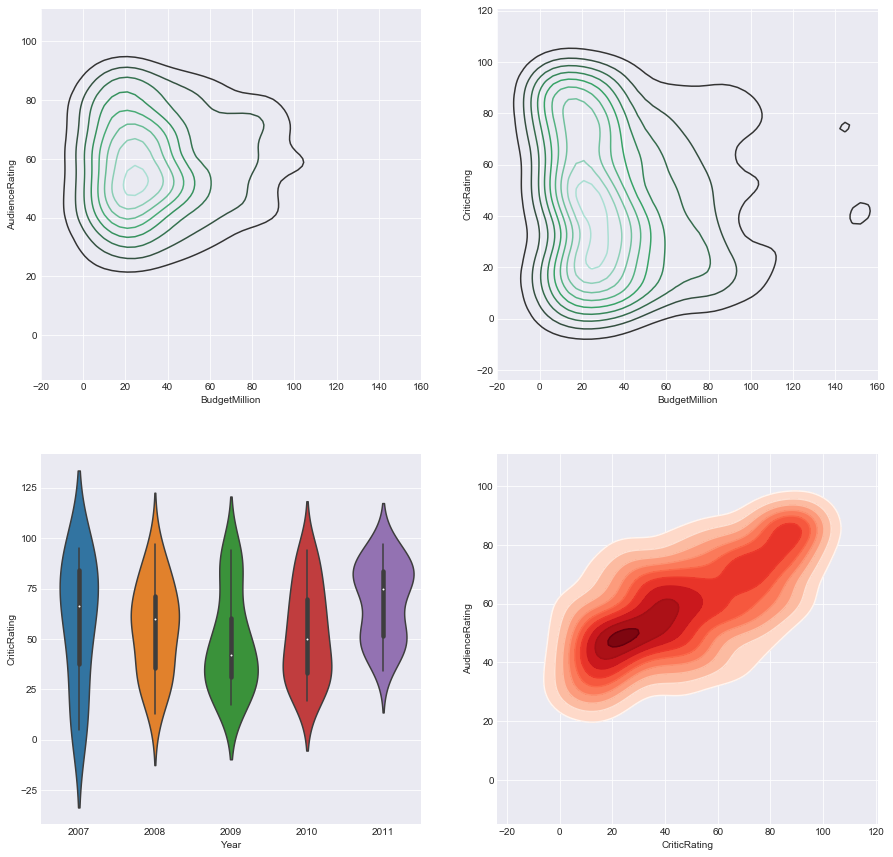

In [65]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 2, figsize=(15, 15))
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax = axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating, ax = axes[0,1])
k1.set(xlim = (-20, 160))
k2.set(xlim = (-20, 160))
z= sns.violinplot(data = movies[movies.Genre == 'Drama'], x= "Year", y = "CriticRating", ax = axes[1,0])
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest = False, cmap = 'Reds',
                ax = axes[1,1])
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap = "Reds",
                ax = axes[1,1])

In [ ]:
#styling dashboards

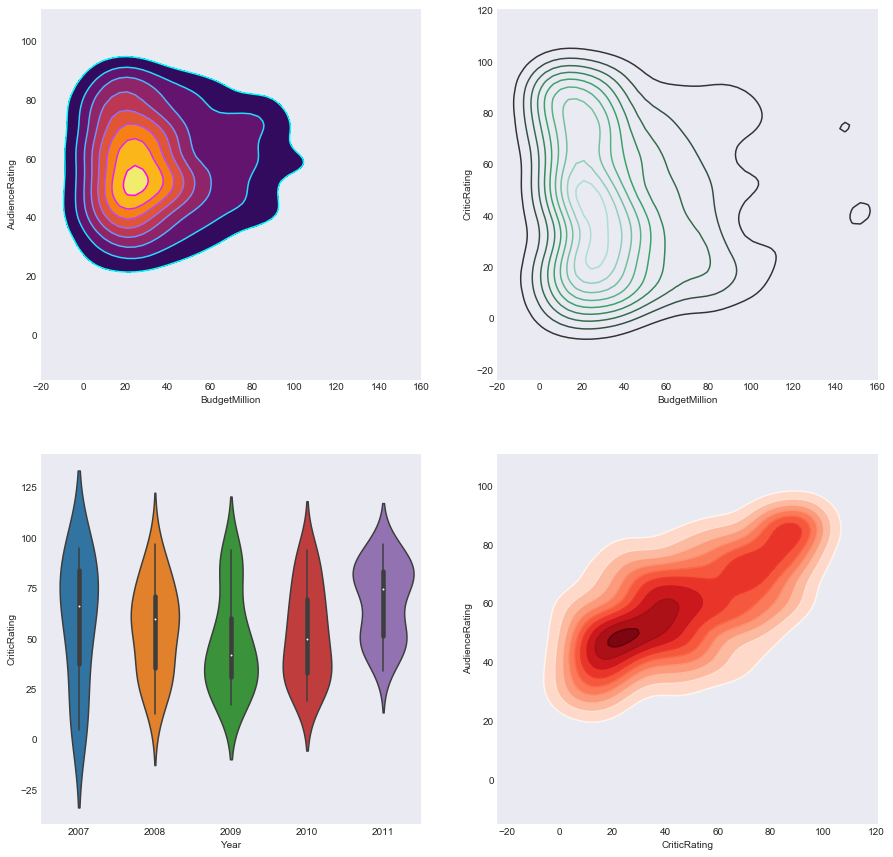

In [80]:
sns.set_style("dark")
f, axes = plt.subplots(2, 2, figsize=(15, 15))
#Plot 0,0
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax = axes[0,0],shade = True,\
                 shade_lowest = False, cmap = "inferno")
k1b = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, cmap = "cool",
                ax = axes[0,0])
#Plot 0,1
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating, ax = axes[0,1])
k1.set(xlim = (-20, 160))
k2.set(xlim = (-20, 160))
#plot 1,0
z= sns.violinplot(data = movies[movies.Genre == 'Drama'], x= "Year", y = "CriticRating", ax = axes[1,0])
#Plot 0,1
k2 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest = False, cmap = 'Reds',
                ax = axes[1,1])
k2b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap = "Reds",
                ax = axes[1,1])